# Movie Genres Data Analysis

### Data Acquisition

In [2]:
# Import the necessary libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [3]:
file_path = '/Users/akoweatty/Downloads/tmdb_movies_data.csv'

In [4]:
# Load the dataset into a dataframe called df

df = pd.read_csv(file_path)

In [5]:
# Make a copy of the dataset into a dataframe called movies in order 
# to preserve the integrity of the original dataframe df
movies = df.copy()

In [6]:
# Display the first few rows of the dataset for discovery

movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


### Data Exploration

In [7]:
# How many rows and columns are in this dataframe?
movies.shape

(10866, 21)

In [8]:
# What are the general informations about this dataset?
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Checking for missing data

In [9]:
# Are there some missing data in the different variables?
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# What is the total number of missing data in this dataset?
movies.isna().sum().sum()

13434

In [11]:
# What is the total number of data in this dataset?
movies.size

228186

Remark:
Approximatively, 6% of the data is missing from the dataset. 

#### Checking for Duplicates

In [12]:
# Are there some duplicated rows in this dataset?
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


In [13]:
# Let's drop the duplicated row from the dataset
movies.drop_duplicates(inplace = True)

In [14]:
# Let's verified that the duplicated row is indeed dropped.
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### Let's drop missing data from specific columns of interest.

In [15]:
# The variables 'Genres', 'cast', and 'director' have some missing data.  Let's drop the missiing data.
movies.dropna(subset = ['genres','cast','director'],inplace = True)

In [16]:
# Verify that there are no more missing data in the variables of interest. 
movies.isna().sum()

id                         0
imdb_id                    5
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7838
director                   0
tagline                 2730
keywords                1425
overview                   2
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Features Creation.  

##### Let's create an additional column called "profit" to the dataset.

In [17]:
movies['profit']= movies['revenue']- movies['budget']

In [18]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,1316249360


#### Let's break up the movies "genres" column into individual movies "genres"

In [19]:
from pandas import Series, DataFrame

In [20]:
# Split the different elements of "Genres" and put them in a list
movies['genres'].str.split('|')

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 10731, dtype: object

In [21]:
# Create a Serie out of each element of that list
movies['genres'].str.split('|').apply(Series,1)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN
...,...,...,...,...,...
10861,Documentary,NaN,NaN,NaN,NaN
10862,Action,Adventure,Drama,NaN,NaN
10863,Mystery,Comedy,NaN,NaN,NaN
10864,Action,Comedy,NaN,NaN,NaN


In [22]:
# Stack the elements of the series having the same row indice and call it split_genres
split = movies['genres'].str.split('|').apply(Series,1).stack()

In [23]:
split

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26753, dtype: object

In [24]:
# Drop the middle index of the split_genres
split.index = split.index.droplevel(-1)

In [25]:
split

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Length: 26753, dtype: object

In [26]:
# Assign a new name to the variable 'split'
split.name = 'split_genres'

In [27]:
# Let's delete the original column 'genres'
del movies['genres']

In [28]:
# Let's add 'split_genres'to the movies dataframe
movies_genres = movies.join(split)

In [29]:
movies_genres.shape

(26753, 22)

In [30]:
movies_genres

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,split_genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,0,Mystery
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,0,Comedy
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,0,Action
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,0,Comedy


#### Date features from the column release date

In [31]:
# Convert the variable 'release_date' to a datetime type
movies_genres['release_date'] = pd.to_datetime(movies_genres['release_date'])
# Generate new columns (month, week an weekday) from the variable 'release_date'
movies_genres['release_month']= movies_genres['release_date'].dt.month
movies_genres['release_month_txt']= movies_genres['release_date'].dt.month_name().str.slice(stop = 3)
movies_genres['release_week']= movies_genres['release_date'].dt.isocalendar().week
movies_genres['release_week_day']= movies_genres['release_date'].dt.day_name().str.slice(stop = 3)

In [32]:
movies_genres.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_average,release_year,budget_adj,revenue_adj,profit,split_genres,release_month,release_month_txt,release_week,release_week_day
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6.5,2015,137999939.3,1.392446e+09,1363528810,Action,6,Jun,24,Tue
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6.5,2015,137999939.3,1.392446e+09,1363528810,Adventure,6,Jun,24,Tue
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6.5,2015,137999939.3,1.392446e+09,1363528810,Science Fiction,6,Jun,24,Tue
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6.5,2015,137999939.3,1.392446e+09,1363528810,Thriller,6,Jun,24,Tue
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,7.1,2015,137999939.3,3.481613e+08,228436354,Action,5,May,20,Wed


In [33]:
movies_genres.shape

(26753, 26)

#### Features selection. 

In [34]:
movies_subset =  movies_genres[['popularity','budget','revenue','original_title','director','runtime','vote_count','vote_average','profit','split_genres','release_year','release_month_txt','release_week_day']]


In [35]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [36]:
movies_subset.head(10)

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,profit,split_genres,release_year,release_month_txt,release_week_day
0,32.9858,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5000,1363528810,Action,2015,Jun,Tue
0,32.9858,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5000,1363528810,Adventure,2015,Jun,Tue
0,32.9858,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5000,1363528810,Science Fiction,2015,Jun,Tue
0,32.9858,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5000,1363528810,Thriller,2015,Jun,Tue
1,28.4199,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1000,228436354,Action,2015,May,Wed
1,28.4199,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1000,228436354,Adventure,2015,May,Wed
1,28.4199,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1000,228436354,Science Fiction,2015,May,Wed
1,28.4199,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1000,228436354,Thriller,2015,May,Wed
2,13.1125,110000000,295238201,Insurgent,Robert Schwentke,119,2480,6.3000,185238201,Adventure,2015,Mar,Wed
2,13.1125,110000000,295238201,Insurgent,Robert Schwentke,119,2480,6.3000,185238201,Science Fiction,2015,Mar,Wed


In [37]:
movies_subset.describe(include = 'all')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,profit,split_genres,release_year,release_month_txt,release_week_day
count,26753.0000,26753.0000,26753.0000,26753,26753,26753.0000,26753.0000,26753.0000,26753.0000,26753,26753.0000,26753,26753
unique,nan,nan,nan,10439,5018,nan,nan,nan,nan,20,nan,12,7
top,nan,nan,nan,Annie,Woody Allen,nan,nan,nan,nan,Drama,nan,Sep,Fri
freq,nan,nan,nan,11,105,nan,nan,nan,nan,4746,nan,3109,10551
mean,0.7102,17636653.1326,47798854.0006,NaN,NaN,103.0489,251.6914,5.9502,30162200.8680,NaN,2000.6571,NaN,NaN
std,1.1181,34707274.6609,132644574.5057,NaN,NaN,29.5609,640.1236,0.9094,109935375.5516,NaN,12.7711,NaN,NaN
min,0.0002,0.0000,0.0000,NaN,NaN,0.0000,10.0000,1.5000,-413912431.0000,NaN,1960.0000,NaN,NaN
25%,0.2266,0.0000,0.0000,NaN,NaN,90.0000,18.0000,5.4000,0.0000,NaN,1994.0000,NaN,NaN
50%,0.4143,25000.0000,0.0000,NaN,NaN,100.0000,44.0000,6.0000,0.0000,NaN,2005.0000,NaN,NaN
75%,0.7796,20000000.0000,31327899.0000,NaN,NaN,112.0000,176.0000,6.6000,13706101.0000,NaN,2011.0000,NaN,NaN


#### Create Boxplots To Check for Outliers in the variables: (budget, popularity and profit)

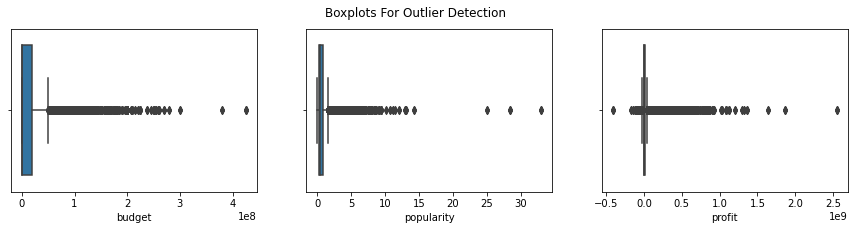

In [38]:
fig, axes = plt.subplots(1,3, figsize = (15,3))
fig.suptitle("Boxplots For Outlier Detection")
sns.boxplot(ax = axes[0], x = movies_subset['budget'])
sns.boxplot(ax = axes[1], x = movies_subset['popularity'])
sns.boxplot(ax = axes[2], x = movies_subset['profit'])
plt.show()

##### The 3 variables; 'budget', 'popularity', and 'profit' contain some outliers.  

In [39]:
# Calculate the Lower_limit and the Upper_limit of the variable 'budget'.
perc_25 = movies_subset['budget'].quantile(0.25)
perc_75 = movies_subset['budget'].quantile(0.75)
Iqr = perc_75 - perc_25
upper_limit = perc_75 + (Iqr *1.5)
print('upper_limit = '+ str(upper_limit))
lower_limit = perc_25 - (Iqr * 1.5)
print('lower_limit = '+ str(lower_limit))


upper_limit = 50000000.0
lower_limit = -30000000.0


In [40]:
# Calculate the Lower_limit and the Upper_limit of the variable 'popularity'.
perc_25 = movies_subset['popularity'].quantile(0.25)
perc_75 = movies_subset['popularity'].quantile(0.75)
Iqr = perc_75 - perc_25
upper_limit = perc_75 + (Iqr *1.5)
print('upper_limit = '+ str(upper_limit))
lower_limit = perc_25 - (Iqr * 1.5)
print('lower_limit = '+ str(lower_limit))


upper_limit = 1.6091275
lower_limit = -0.6029565


In [41]:
# Calculate the Lower_limit and the Upper_limit of the variable 'profit'.
perc_25 = movies_subset['revenue'].quantile(0.25)
perc_75 = movies_subset['revenue'].quantile(0.75)
Iqr = perc_75 - perc_25
upper_limit = perc_75 + (Iqr * 1.5)
print('upper_limit = '+ str(upper_limit))
lower_limit = perc_25 - (Iqr * 1.5)
print('lower_limit = '+ str(lower_limit))


upper_limit = 78319747.5
lower_limit = -46991848.5


#### Check for correlations among all the numeric variables.

In [42]:
movies_subset.corr(method = 'pearson')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit,release_year
popularity,1.0000,0.5410,0.6654,0.1434,0.7947,0.2387,0.6321,0.1122
budget,0.5410,1.0000,0.7291,0.2034,0.6413,0.1053,0.5640,0.1501
revenue,0.6654,0.7291,1.0000,0.1741,0.7985,0.1992,0.9764,0.0826
runtime,0.1434,0.2034,0.1741,1.0000,0.1771,0.1762,0.1459,-0.1354
vote_count,0.7947,0.6413,0.7985,0.1771,1.0000,0.2836,0.7609,0.1330
vote_average,0.2387,0.1053,0.1992,0.1762,0.2836,1.0000,0.2071,-0.1306
profit,0.6321,0.5640,0.9764,0.1459,0.7609,0.2071,1.0000,0.0523
release_year,0.1122,0.1501,0.0826,-0.1354,0.1330,-0.1306,0.0523,1.0000


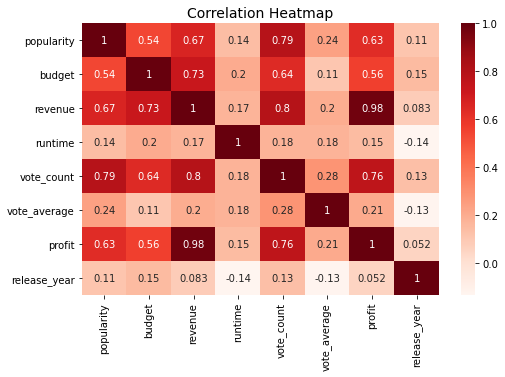

In [43]:
f = plt.figure(figsize = (8,5))
f = sns.heatmap(movies_subset.corr(method = 'pearson'),annot = True,cmap = 'Reds')
plt.title('Correlation Heatmap', fontsize = 14)
plt.show()

##### The Heatmap shows a strong correlation between 'popuarity' and 'vote_count', a strong correlation between 'budget' and 'revenue', a strong correlation between 'revenue' and 'vote_count' and, a stronger correlation between 'revenue' and 'profit'. 

## Findings From the Analysis

### Question 1)
Is there any correlation between the money spent on the movie budget and movie revenue?

<AxesSubplot:xlabel='budget', ylabel='revenue'>

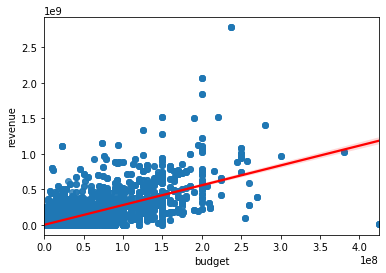

In [44]:
sns.regplot(x = movies_subset['budget'], y = movies_subset['revenue'],data = movies_subset, line_kws = {'color': 'red'})


##### As the amount of money spent on the movies budget increases, the revenue generated by the movies genres increases. There is, therefore, a positive correlation between the variables 'budget' and 'revenue'


### Question 2)
Is there any correlation between the movie revenue and the movie profit?


<AxesSubplot:xlabel='revenue', ylabel='profit'>

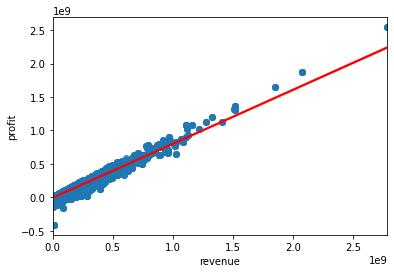

In [45]:
sns.regplot(x = movies_subset['revenue'], y = movies_subset['profit'],data = movies_subset, line_kws = {'color': 'red'})


##### As the amount of revenue generated by  the movies genres increases, the profit of the movies genres increases. There is therefore a positive correlation between the variables  'revenue' and 'profit'.

### Question 3)
Is there any correlation between the popularity of the movie and the movie vote count. 

<AxesSubplot:xlabel='popularity', ylabel='vote_count'>

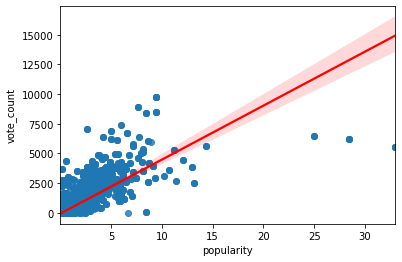

In [46]:
sns.regplot(x = movies_subset['popularity'], y = movies_subset['vote_count'],data = movies_subset, line_kws = {'color': 'red'})

##### As the amount of the movies genres popularity increases, the vote count of  the movies genres increases. There is therefore a positive correlation between the variables 'popularity' and 'vote_count' 

### Question 4)
What are the five best years for movie genres released from 1960 to 2015?

In [47]:
groupedYear_genres = movies_subset.groupby('release_year').count().sort_values(['split_genres'],ascending = False)

In [48]:
best_years = groupedYear_genres[groupedYear_genres['split_genres'] >= 1263]

In [49]:
best_years

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,profit,split_genres,release_month_txt,release_week_day
release_year,,,,,,,,,,,,
2014,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445
2015,1372,1372,1372,1372,1372,1372,1372,1372,1372,1372,1372,1372
2013,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369
2009,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346
2011,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263


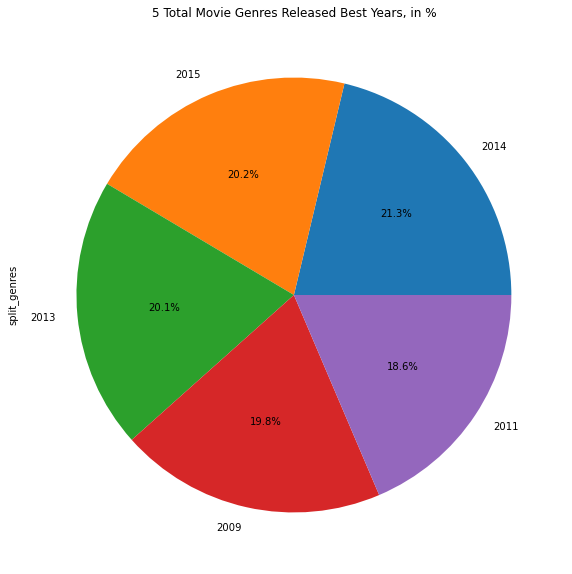

In [50]:
best_years['split_genres'].plot.pie(title = '5 Total Movie Genres Released Best Years, in %', autopct = '%1.1f%%', figsize = (10,10))
plt.show()
            

##### The best five years for the movie genres from 1960 to 2015 are:
[2014,2015,2013, 2009, 2011]

### Question 5)
How many movies genres were made from 1960 to 2015

In [51]:
groupedM_genres = movies_subset.groupby('split_genres').count()

In [52]:
groupedM_genres

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,profit,release_year,release_month_txt,release_week_day
split_genres,,,,,,,,,,,,
Action,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
Adventure,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
Animation,664,664,664,664,664,664,664,664,664,664,664,664
Comedy,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775
Crime,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353
Documentary,470,470,470,470,470,470,470,470,470,470,470,470
Drama,4746,4746,4746,4746,4746,4746,4746,4746,4746,4746,4746,4746
Family,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214
Fantasy,908,908,908,908,908,908,908,908,908,908,908,908


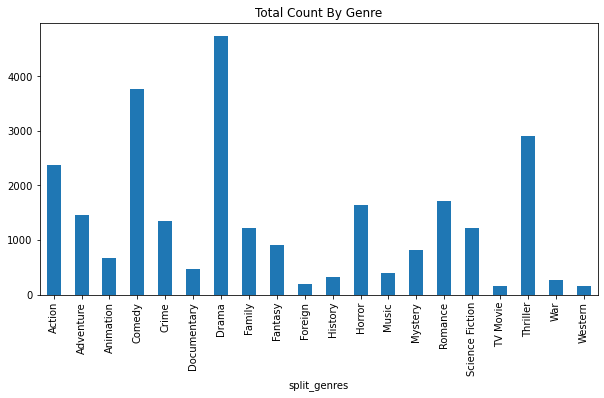

In [53]:
groupedM_genres['original_title'].plot.bar(title ='Total Count By Genre',figsize = (10,5))
plt.show()

### Question 6)
How Do Average Budgets Compare Across Different Genres?

In [54]:
avg_genres = movies_subset.groupby('split_genres').mean()

In [55]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [56]:
avg_genres.sort_values('budget', ascending = False,inplace = True)

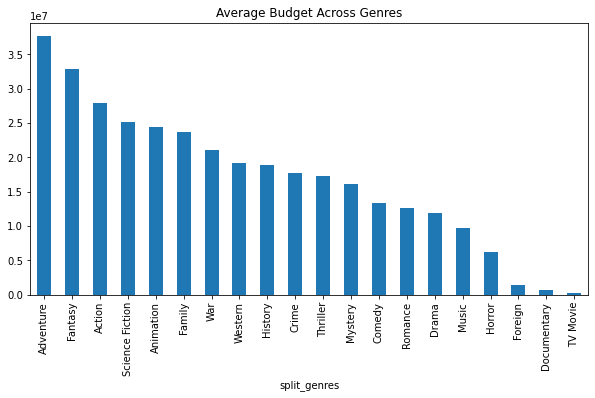

In [57]:
avg_genres['budget'].plot.bar(title = 'Average Budget Across Genres', figsize = (10,5))
plt.show()

### Question 7)
How do box office revenues and profits compare across different genres?

In [58]:
avg_genres.sort_values('profit', ascending = True,inplace = True)

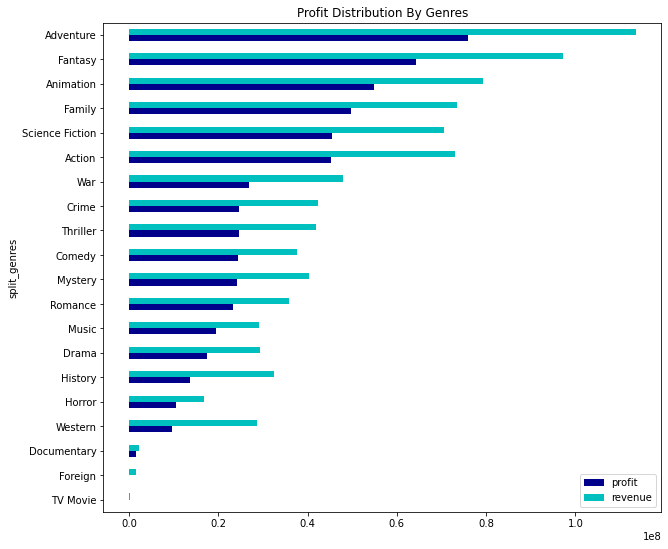

In [59]:
avg_genres[['profit','revenue']].plot.barh(title = 'Profit Distribution By Genres', color =('Darkblue','c'),figsize = (10,9))
plt.show()                                          

In [60]:
avg_genres.sort_values('revenue', ascending = True,inplace = True)

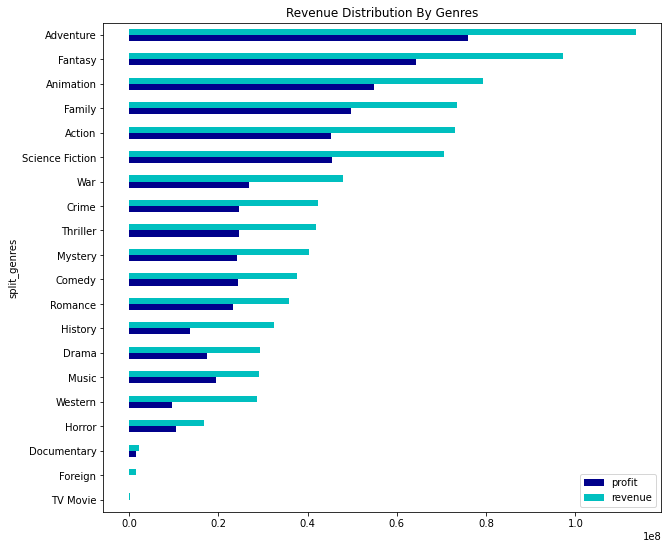

In [61]:
avg_genres[['profit','revenue']].plot.barh(title = 'Revenue Distribution By Genres', color =('Darkblue','c'),figsize = (10,9))
plt.show()             

#### Adventure, Fantasy, Animation and Family  brought in more revenues and profits than the other movie genres. 